In [1]:
import pandas as pd
import matplotlib


In [ ]:
df_weather = pd.read_csv(
    'Weather.csv',
    header=1,
    sep=None,            # let Python sniff ";" or "\t" or ","
    engine='python',
    encoding='utf-16-le'
)
print(df_weather.columns.tolist())



['Time (LST)', 'Air Temp (°F)', '0.5 m Air Temp (°F)', '1.5 m Air Temp (°F)', '3 m Air Temp (°F)', 'Relative Humidity (%)', 'Precipitation (in)', 'Accumulated Precip (in)', 'Solar Radiation (W/m²)', 'Wind Speed (mph)', 'Wind Direction (°)', 'Wind Gust (mph)', '4" Bare Soil Temp (°F)', '4" Grass Soil Temp (°F)', '2" Soil Temp (°F)', '2" Soil Water Content (%)', '4" Soil Temp (°F)', '4" Soil Water Content (%)', '8" Soil Temp (°F)', '8" Soil Water Content (%)', '20" Soil Temp (°F)', '20" Soil Water Content (%)', 'Inversion Strength', 'Max Inversion', 'Battery Voltage', 'Heat Index (°F)', 'Wind Chill (°F)']


In [12]:
# You already have df_weather with all the columns
# Just convert the Time column to datetimes:
df_weather['Time (LST)'] = pd.to_datetime(
    df_weather['Time (LST)'],
    infer_datetime_format=True
)

# Read in your labels (assuming this one loads cleanly with parse_dates):
df_labels = pd.read_csv(
    'labels_Juli.csv',
    parse_dates=['Time (LST)']
)

# Merge: keep every weather row, add in only the Path column from labels
df_merged = df_weather.merge(
    df_labels[['Time (LST)', 'Path']],
    on='Time (LST)',
    how='left'
)
print(df_merged.columns.tolist())
print(df_merged.head())


['Time (LST)', 'Air Temp (°F)', '0.5 m Air Temp (°F)', '1.5 m Air Temp (°F)', '3 m Air Temp (°F)', 'Relative Humidity (%)', 'Precipitation (in)', 'Accumulated Precip (in)', 'Solar Radiation (W/m²)', 'Wind Speed (mph)', 'Wind Direction (°)', 'Wind Gust (mph)', '4" Bare Soil Temp (°F)', '4" Grass Soil Temp (°F)', '2" Soil Temp (°F)', '2" Soil Water Content (%)', '4" Soil Temp (°F)', '4" Soil Water Content (%)', '8" Soil Temp (°F)', '8" Soil Water Content (%)', '20" Soil Temp (°F)', '20" Soil Water Content (%)', 'Inversion Strength', 'Max Inversion', 'Battery Voltage', 'Heat Index (°F)', 'Wind Chill (°F)', 'Path']
           Time (LST)  Air Temp (°F)  0.5 m Air Temp (°F)  \
0 2025-04-27 18:00:00           69.4                 67.1   
1 2025-04-27 17:30:00           70.0                 67.6   
2 2025-04-27 17:00:00           69.6                 68.0   
3 2025-04-27 16:30:00           69.6                 67.8   
4 2025-04-27 16:00:00           69.3                 68.0   

   1.5 m Air T

/tmp/ipykernel_108219/1951274079.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_weather['Time (LST)'] = pd.to_datetime(


In [11]:
df_merged.describe()

,Time (LST),Air Temp (°F),0.5 m Air Temp (°F),1.5 m Air Temp (°F),3 m Air Temp (°F),Relative Humidity (%),Precipitation (in),Accumulated Precip (in),Wind Speed (mph),Wind Direction (°),...,"4"" Soil Water Content (%)","8"" Soil Temp (°F)","8"" Soil Water Content (%)","20"" Soil Temp (°F)","20"" Soil Water Content (%)",Inversion Strength,Max Inversion,Battery Voltage,Heat Index (°F),Wind Chill (°F)
count,865,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,...,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,16.00000,206.000000
mean,2025-04-18 18:00:00,55.222659,54.493988,54.836416,55.019769,62.727168,0.001364,0.001364,8.313295,174.314451,...,39.745665,53.218497,36.991908,50.135145,44.058960,0.965318,0.850867,13.638150,80.71875,39.850000
min,2025-04-09 18:00:00,26.600000,24.400000,25.700000,28.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,46.200000,32.000000,46.200000,39.000000,0.000000,-1.000000,13.000000,79.40000,27.600000
25%,2025-04-14 06:00:00,46.800000,46.400000,46.600000,46.600000,46.000000,0.000000,0.000000,4.000000,99.000000,...,38.000000,50.200000,36.000000,47.800000,44.000000,0.000000,0.000000,13.000000,80.15000,36.225000
50%,2025-04-18 18:00:00,54.900000,54.500000,54.500000,54.500000,64.000000,0.000000,0.000000,7.200000,162.000000,...,39.000000,52.900000,37.000000,49.100000,44.000000,0.000000,0.000000,14.000000,81.05000,40.100000
75%,2025-04-23 06:00:00,63.000000,62.600000,63.000000,63.000000,81.000000,0.000000,0.000000,12.300000,266.000000,...,42.000000,56.300000,38.000000,52.200000,44.000000,1.000000,1.000000,14.000000,81.32500,43.375000
max,2025-04-27 18:00:00,84.200000,82.800000,82.900000,82.400000,95.000000,0.260000,0.260000,24.400000,359.000000,...,43.000000,60.300000,38.000000,54.900000,45.000000,8.000000,8.000000,14.000000,81.70000,49.600000
std,NaN,11.721828,11.884446,11.751555,11.406986,20.483609,0.012152,0.012152,5.267932,102.780862,...,1.775621,3.903356,0.839521,2.717457,0.300449,1.451755,1.558936,0.480814,0.75650,4.899196


<Axes: title={'center': 'Number of Weather Records per Path'}, xlabel='Path'>

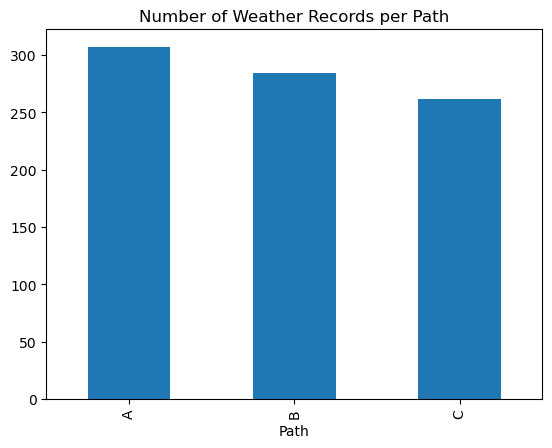

In [13]:
df_merged['Path'].value_counts().plot(
    kind='bar',
    title='Number of Weather Records per Path'
)

In [14]:
df_merged.to_csv(
    'Weather_with_labels.csv',
    index=False,
    encoding='utf-8'
)